# Student Performance Indicator

## Life cycle of a Machine Learning Project

* Understanding the problem statement
* Data xolletion
* Data checks to perform
* Exploratory data analysis
* Data pre-processing
* Model training
* choose best model

### 1) Problem statement

* This projects understand how the student's performance(test score) is affected by other variables such as gender, ethnicity, parental level of education, lunch and test preparation course.

### 2) Data collection

* Data source - https://www.kaggle.com/datasets/rkiattisak/student-performance-in-mathematics
* The data consits of 8 columns and 100 rows.

#### 2.1 Import data and requires packages
importing Pandas, Numpy, Matplotlib, Seaborn and Warnings library.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



## Import the csv Data sa Pandas DataFrame

In [3]:
import os
os.getcwd()

'd:\\GitHub\\End_To_End_ML_Projects\\src\\notebook'

In [4]:
df = pd.read_csv('data\exams_performance.csv')

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [6]:
df.shape

(1000, 8)

### 2.2 Dataset information

* gender: sex of students->(Male/Female)
* race/ethnicity: ethnicity of students->(Group A,B,C,D,E)
* parental level of eduation: parent's final education->(bachelor's degree, some college, master's degree, associate's degree, high school)
* lunch: having lunch before test(standard or free/reduced)
* test preparation course: complete or not complete before test
* maths score
* reading score
* writing score

### 3) Data checks for perform

* check missing values
* check duplicates
* check data type
* check the number of unique values of each column
* check statistics of dataset
* check various categories present in the  different categorical column

#### 3.1 Check missing values

In [7]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in the dataset

#### 3.2 Check duplicates

In [8]:
df.duplicated().sum()

0

There are no duplicates in the dataset

#### 3.3 Check data types

In [9]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 Checking the number of unique values of each column

In [10]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     79
reading score                  71
writing score                  74
dtype: int64

#### 3.5 Check statistics of dataset

In [11]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


#### Insight

* From above description of numerical data, all means are very close to each other- between 67.8 and 70.4;
* All standard deviations are also close- between 14.10 and 15.25;
* While the minimum score for both math and writing is 15, the minimum score for reading is significantly higher at 25.

#### 3.7 Exploring Data

In [12]:
print("Categories in 'gender' variable:  ", end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:  ", end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable:  ", end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:  ", end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:  ", end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' variable:   ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group D' 'group B' 'group C' 'group E' 'group A']
Categories in 'parental level of education' variable:   ['some college' "associate's degree" 'some high school'
 "bachelor's degree" "master's degree" 'high school']
Categories in 'lunch' variable:   ['standard' 'free/reduced']
Categories in 'test preparation course' variable:   ['completed' 'none']


In [13]:
# Define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype in ['int64', 'float64']]
categorical_features = [feature for feature in df.columns if df[feature].dtype =='object']

# Print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### Feature Engineering
#### 3.8 Adding columns for "Total Score" and "Average"

In [14]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group D,some college,standard,completed,59,70,78,207,69.000000
1,male,group D,associate's degree,standard,none,96,93,87,276,92.000000
2,female,group D,some college,free/reduced,none,57,76,77,210,70.000000
3,male,group B,some college,free/reduced,none,70,70,63,203,67.666667
4,female,group D,associate's degree,standard,none,83,85,86,254,84.666667


In [15]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 9
Number of students with full marks in Writing: 13
Number of students with full marks in Reading: 10


In [16]:
math_less_20 = df[df['math score'] <=20]['average'].count()
writing_less_20 = df[df['writing score'] <=20]['average'].count()
reading_less_20 = df[df['reading score'] <=20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 2
Number of students with less than 20 marks in Writing: 2
Number of students with less than 20 marks in Reading: 0


#### Insights
* From above values we get students have performed the worst in the Maths
* Best performance in reading section

### Exploring Data (Visualization)
* Histogram
* Kernel Density Estimate (KDE)

#### 4.1.1 Histogram & KDE

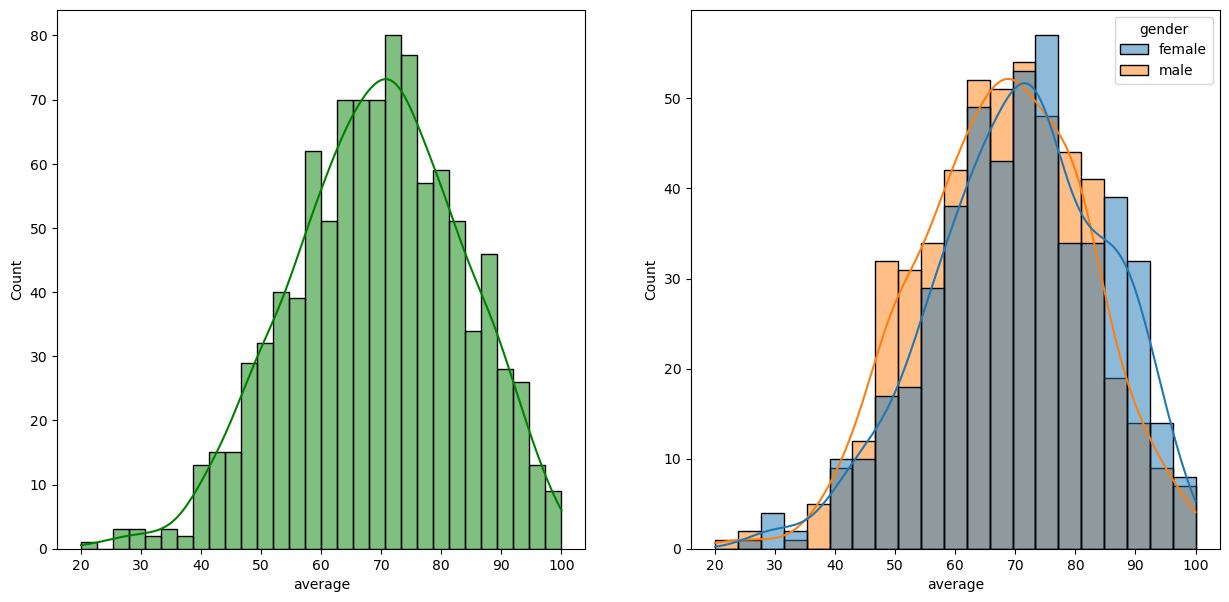

In [17]:
# Creating subplots
fig, axs = plt.subplots(1,2, figsize=(15,7))

# First plot: histogram of 'average' scores
sns.histplot(data=df, x='average' ,bins=30, kde=True, color='g', ax=axs[0])

# Second plot: histogram of 'average' scores with hue by 'gender'
sns.histplot(data=df, x='average', kde=True, hue='gender', ax=axs[1])

# Display the plots
plt.show()


#### Insights
* Female students tend to perform well than male students

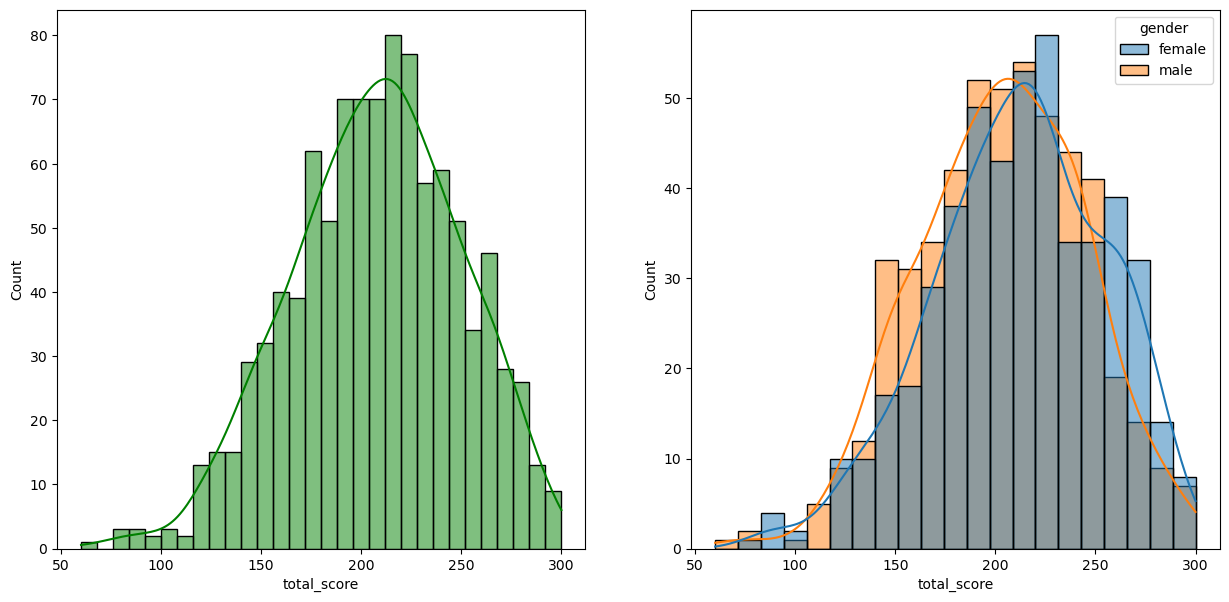

In [18]:
# Creating subplots
fig, axs = plt.subplots(1,2, figsize=(15,7))

# First plot: histogram of 'average' scores
sns.histplot(data=df, x='total_score' ,bins=30, kde=True, color='g', ax=axs[0])

# Second plot: histogram of 'average' scores with hue by 'gender'
sns.histplot(data=df, x='total_score', kde=True, hue='gender', ax=axs[1])

# Display the plots
plt.show()

#### Insights
* Female students tend to perform well than male students.

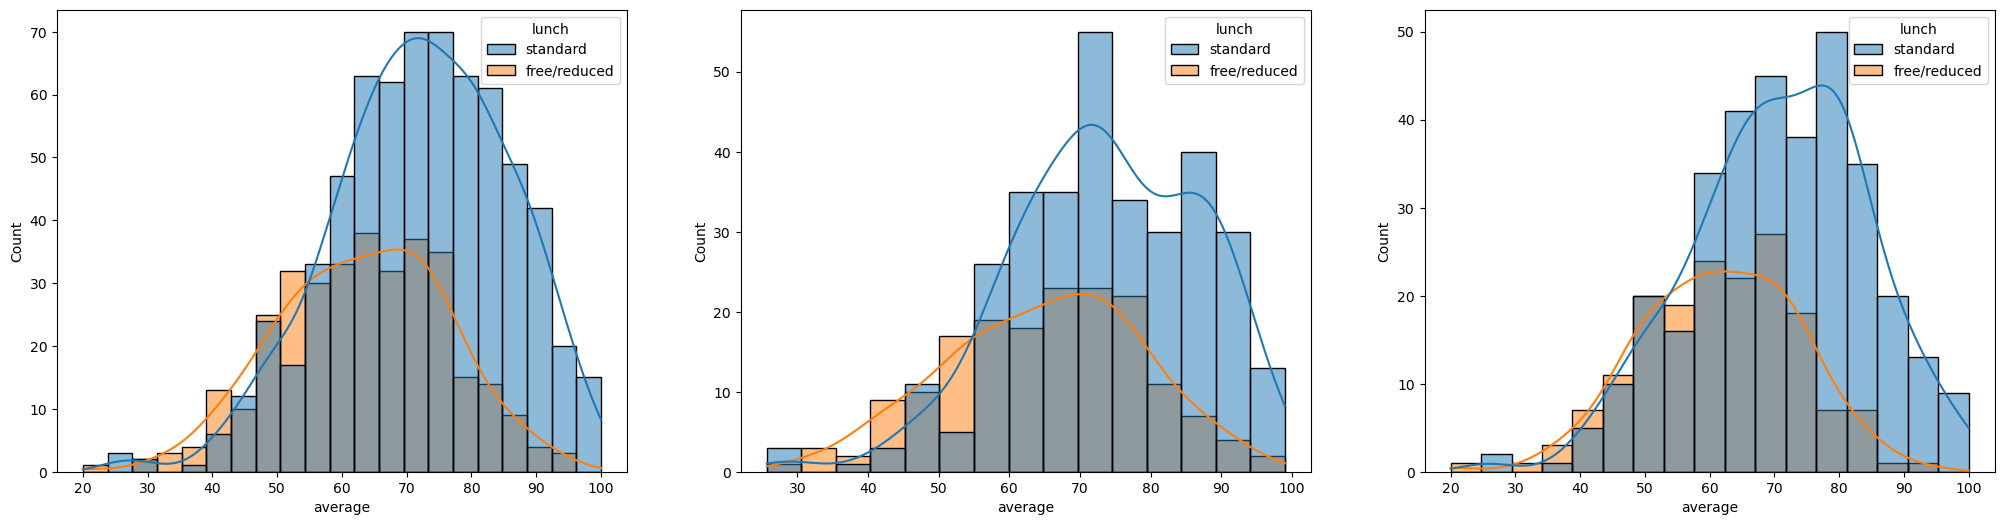

In [19]:
fig, axs = plt.subplots(1,3, figsize=(25,6))

sns.histplot(data=df, x='average', kde=True, hue='lunch', ax=axs[0]) 

sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch', ax=axs[1])

sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch', ax=axs[2])

plt.show()

#### Insights
* Standard lunch helps perform well in exams
* Standard lunch helps perform well in exams be it a male or female.

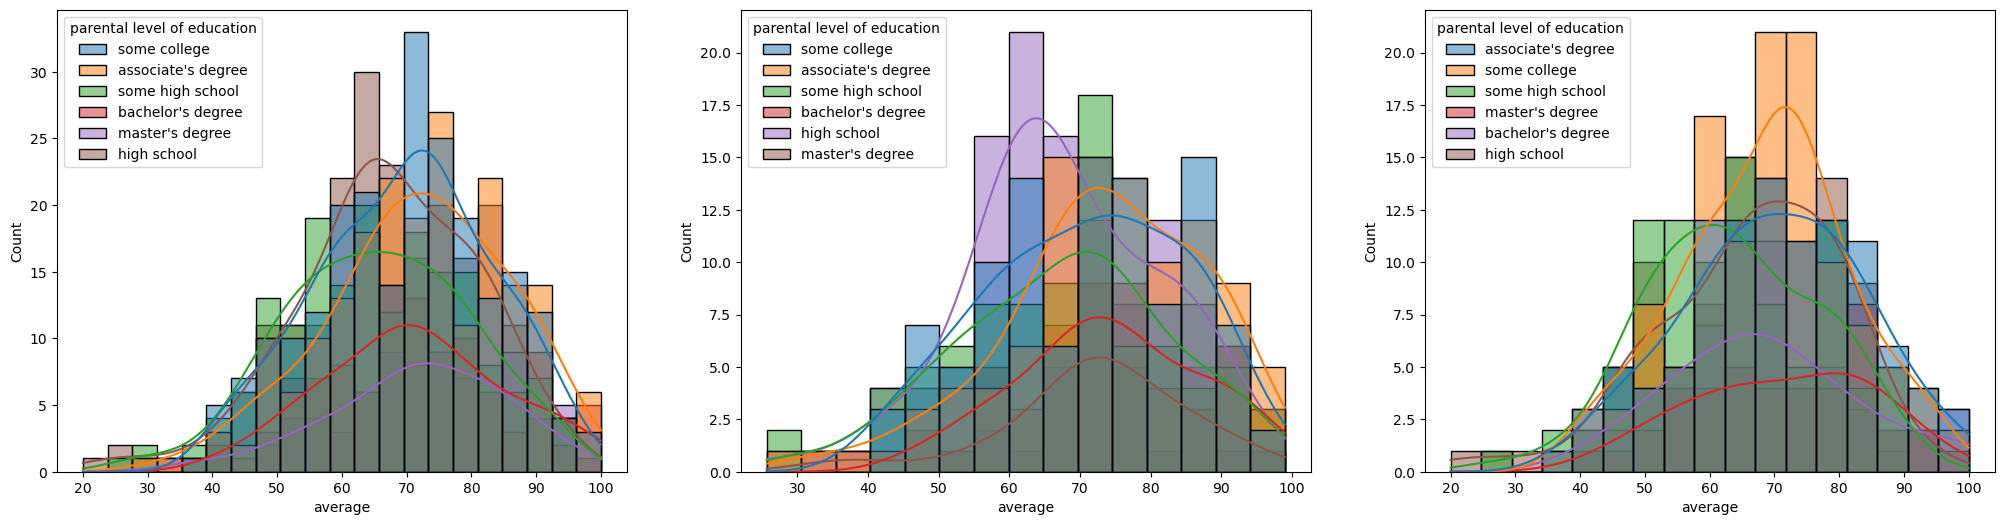

In [20]:
fig, axs = plt.subplots(1,3, figsize=(25,6))

sns.histplot(data=df, x='average', kde=True, hue='parental level of education', ax=axs[0])

sns.histplot(data=df[df.gender=='female'], x= 'average', kde=True, hue='parental level of education', ax=axs[1])

sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='parental level of education',ax=axs[2])

plt.show()

#### Insights

* In general parent's education don't help student perform well in exam.

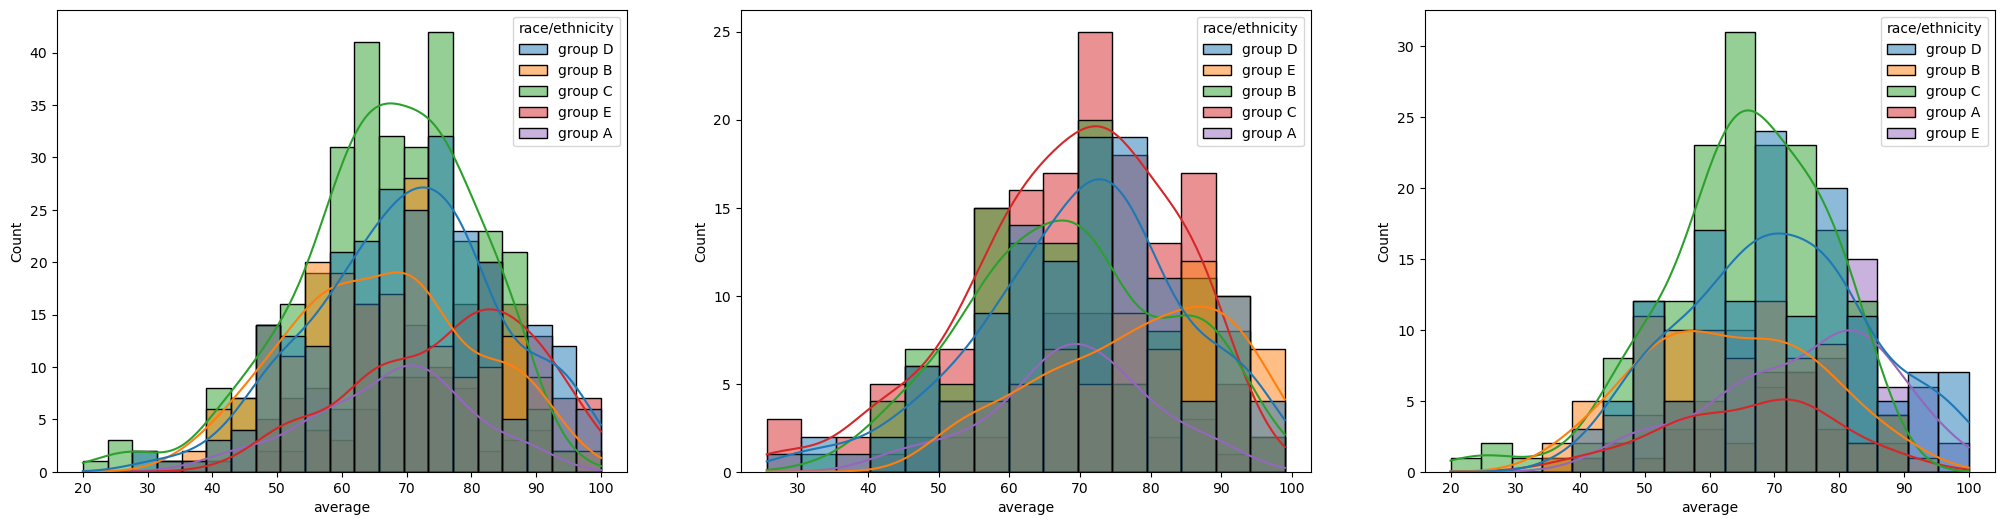

In [21]:
fig, axs = plt.subplots(1,3, figsize=(25,6))

sns.histplot(data=df, x='average', kde=True, hue='race/ethnicity', ax=axs[0])

sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='race/ethnicity', ax=axs[1])

sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='race/ethnicity', ax=axs[2])

plt.show()


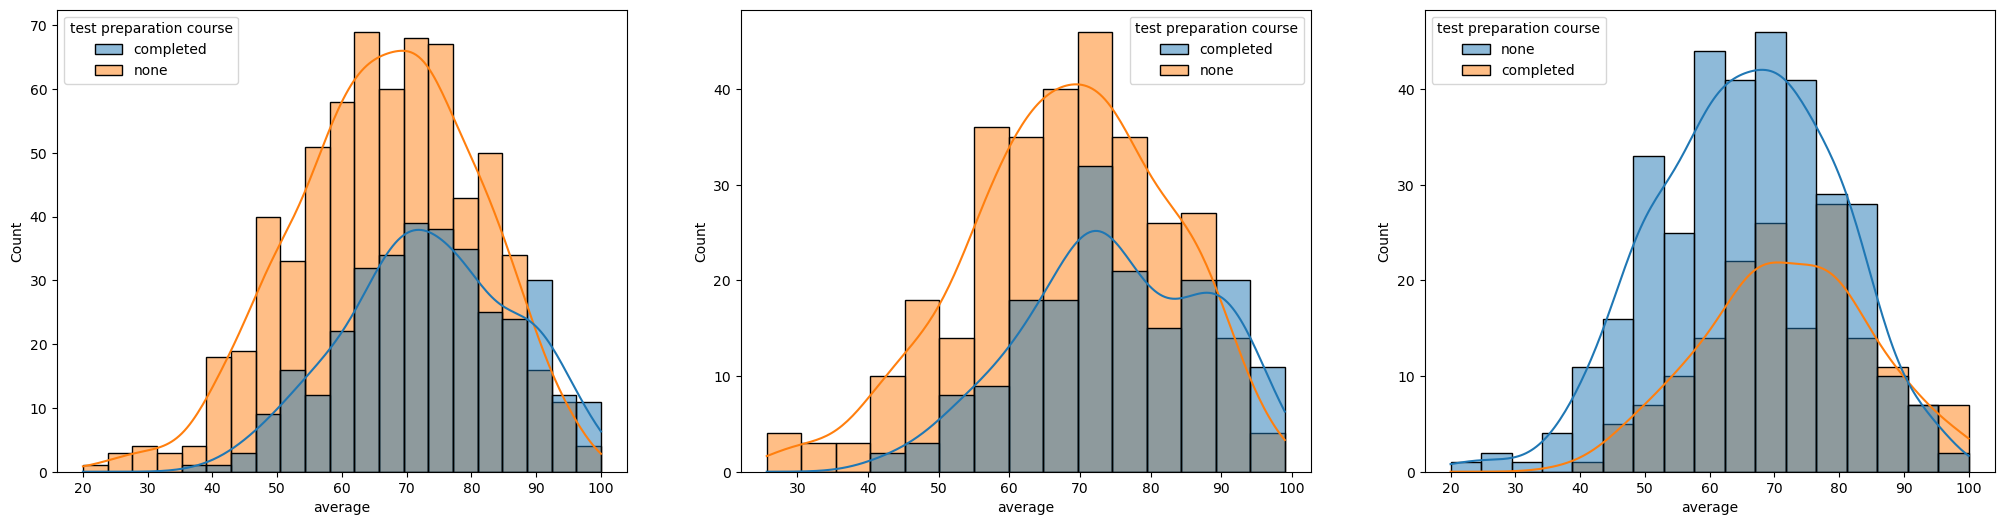

In [22]:
fig, axs = plt.subplots(1,3, figsize=(25,6))

sns.histplot(data=df, x='average', kde=True, hue='test preparation course', ax=axs[0])

sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='test preparation course', ax=axs[1])

sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='test preparation course', ax=axs[2])

plt.show()

#### 4.2 Maximumum score of students in all three subjects

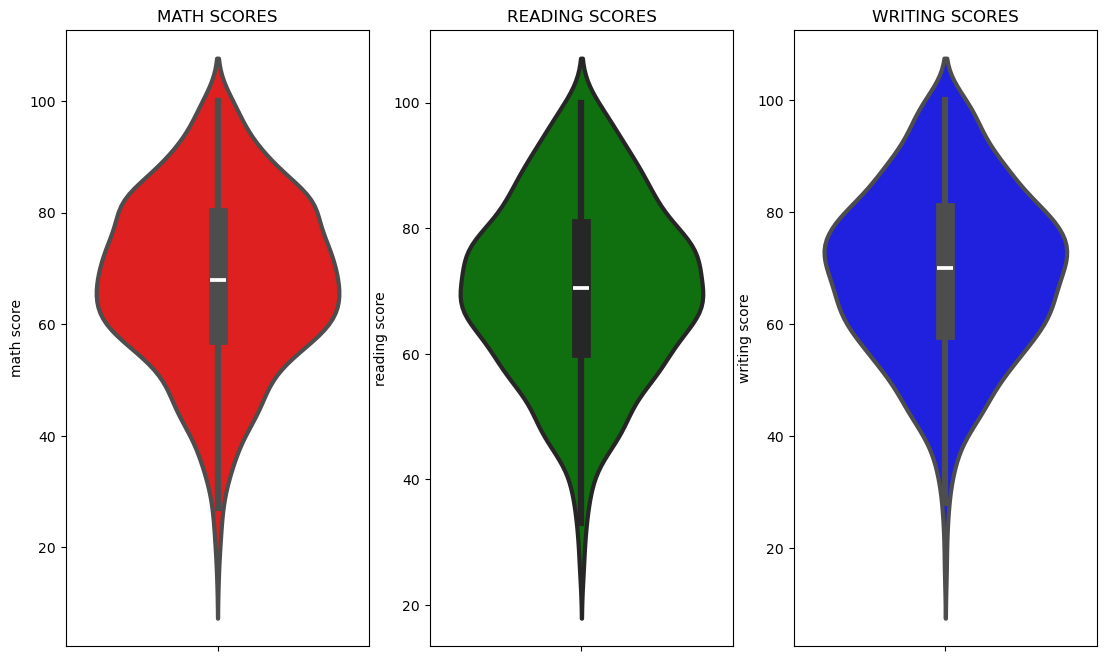

In [23]:
plt.figure(figsize=(18,8))

plt.subplot(1,4,1)
plt.title('MATH SCORES')
sns.violinplot(y='math score', data=df, color='red', linewidth=3)

plt.subplot(1,4,2)
plt.title('READING SCORES')
sns.violinplot(y='reading score', data=df, color='green', linewidth=3)

plt.subplot(1,4,3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score', data=df, color='blue', linewidth=3)

plt.show()


#### 4.3 Multivariate analysis using pieplot

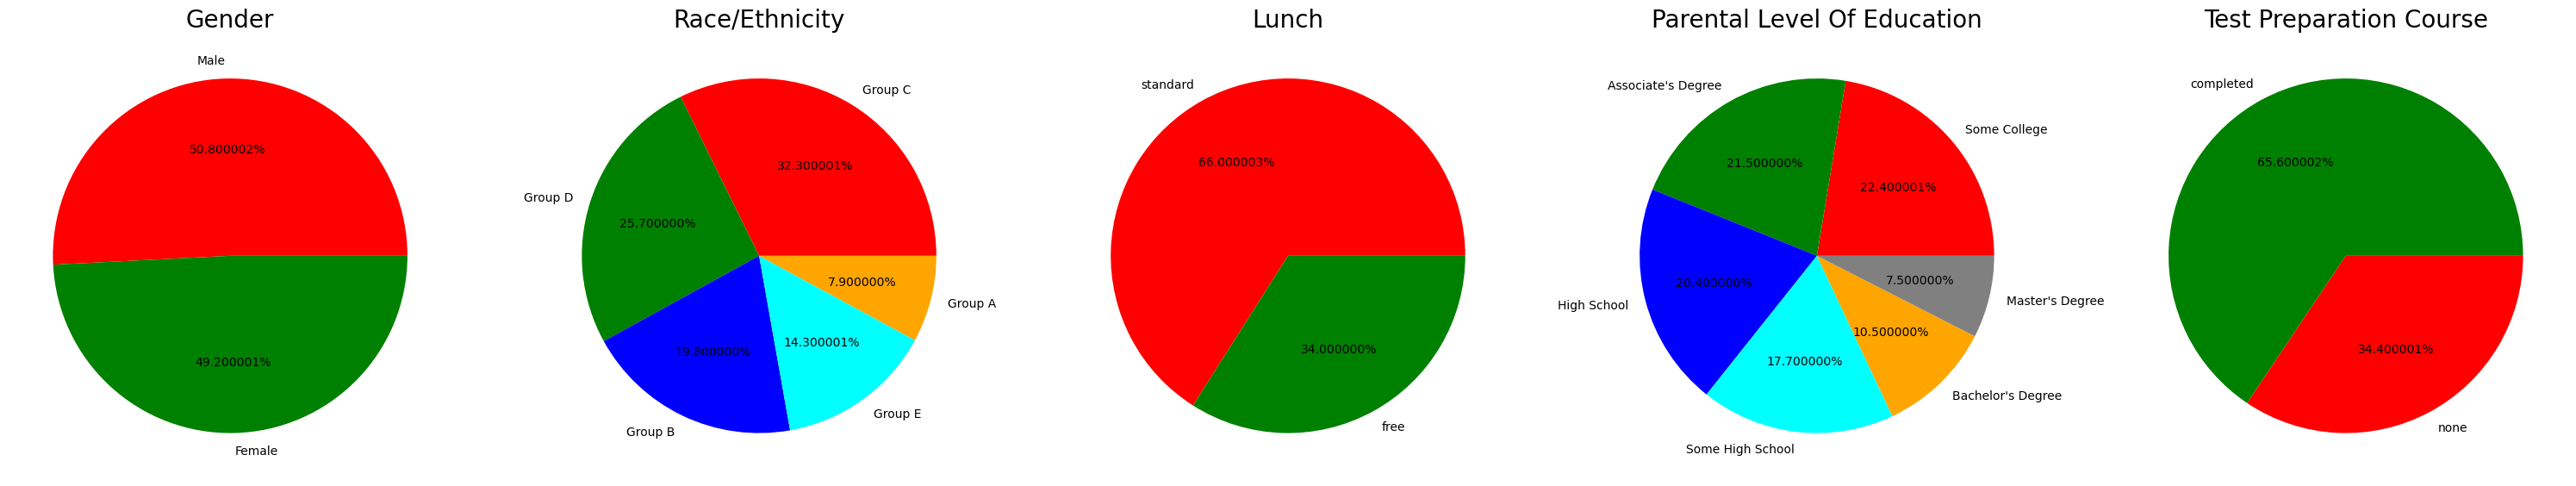

In [24]:
plt.rcParams['figure.figsize'] = (30, 12) # set the default configuration for matplotlib plots

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Male', 'Female'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels,autopct='%2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, colors=color, labels=labels, autopct='%2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels = 'standard', 'free'
color = 'red', 'green'

plt.pie(size,colors=color, labels=labels,autopct='%2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

plt.subplot(1,5,4)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size,colors=color, labels=labels, autopct='%2f%%')
plt.title('Parental Level Of Education', fontsize=20)
plt.axis('off')

plt.subplot(1,5,5)
size = df['test preparation course'].value_counts()
labels = 'completed', 'none'
color = 'green', 'red'

plt.pie(size, colors=color, labels=labels, autopct='%2f%%')
plt.title('Test Preparation Course', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.show()



#### Insights

* Number of Male and Female students is almost equal
* Number of students are greatest in Group C
* Number of students who have standard lunch are greater
* Number of students who have enrolled in test preparation course is greater
* Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"


### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN

    How is distribution of Gender ?
    Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )



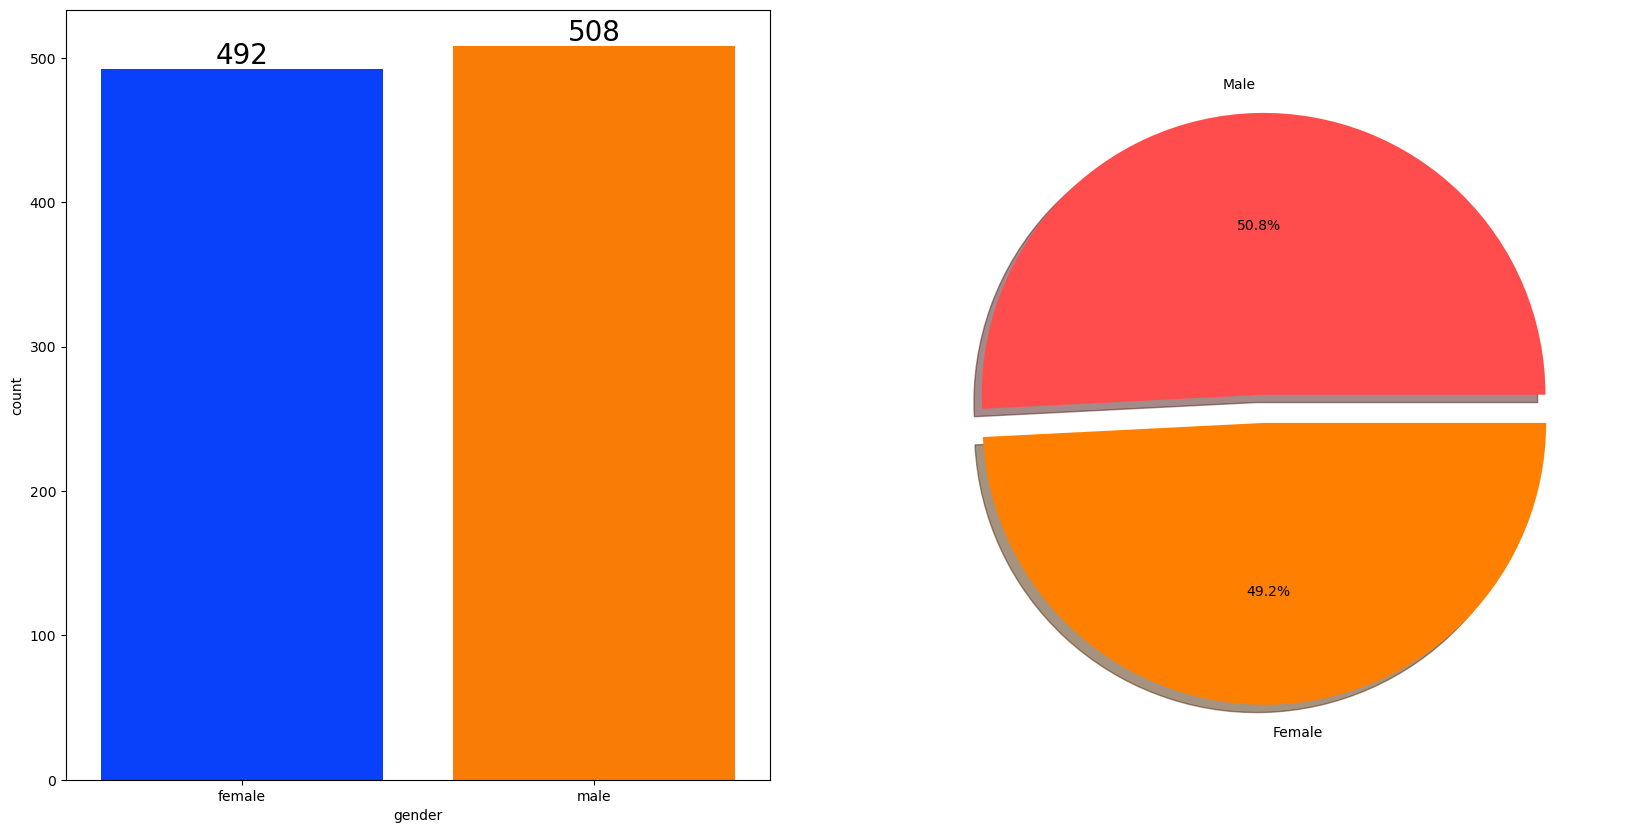

In [25]:
f, ax = plt.subplots(1,2, figsize=(20,10))
sns.countplot(x=df['gender'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()



#### Insights

    Gender has balanced data with female students are 492 (49.2%) and male students are 508 (50.8%)



In [26]:
df['gender'].value_counts()

gender
male      508
female    492
Name: count, dtype: int64

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [27]:
# Select only the numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Group by gender and calculate the mean for numeric columns
gender_group = numeric_df.groupby(df['gender']).mean()

gender_group

,math score,reading score,writing score,total_score,average
gender,,,,,
female,64.77439,73.473577,73.439024,211.686992,70.562331
male,70.75000,67.387795,64.976378,203.114173,67.704724


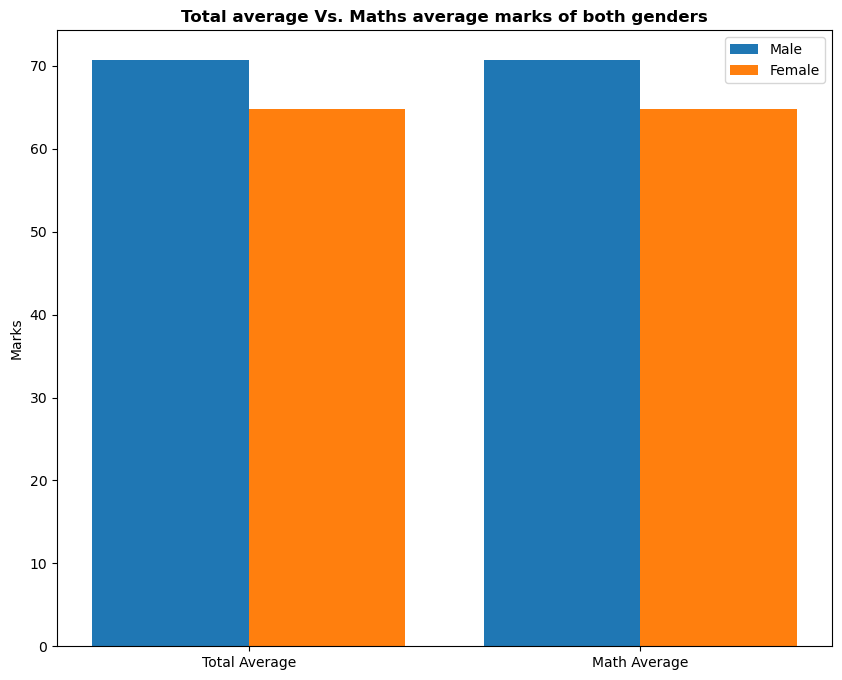

In [28]:
plt.figure(figsize=(10,8))

x = ['Total Average', 'Math Average']

# Accessing the values from gender_group using iloc to access by row index and column names
female_score = [gender_group['math score'].iloc[0]]  # Row for female (position 0), 'math score' column
male_score = [gender_group['math score'].iloc[1]]    # Row for male (position 1), 'math score' column

x_axis = np.arange(len(x))

plt.bar(x_axis -0.2 , male_score, 0.4, label='Male')
plt.bar(x_axis +0.2 , female_score, 0.4, label='Female')

plt.xticks(x_axis, x)
plt.ylabel('Marks')
plt.title("Total average Vs. Maths average marks of both genders", fontweight='bold')
plt.legend()
plt.show()
 

#### Insights
?????

4.4.2 RACE/EHNICITY COLUMN

    How is Group wise distribution ?
    Is Race/Ehnicity has any impact on student's performance ?

UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

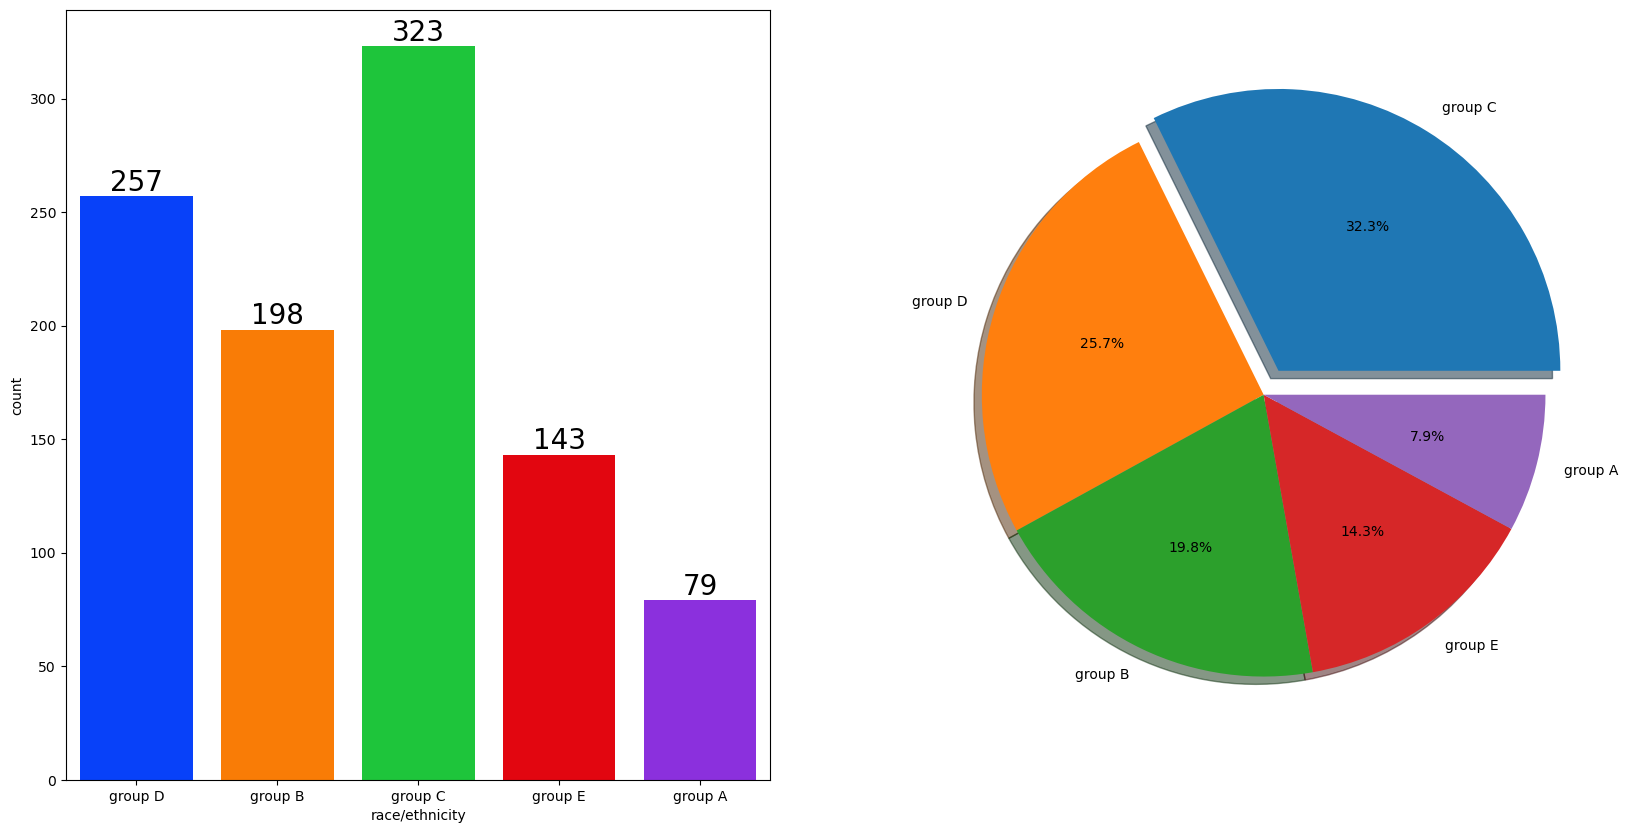

In [29]:
f, ax = plt.subplots(1,2, figsize=(20,10))
sns.countplot(x='race/ethnicity', data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()  

#### Insights

    Most of the student belonging from group C /group D.
    Lowest number of students belong to group A.

BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

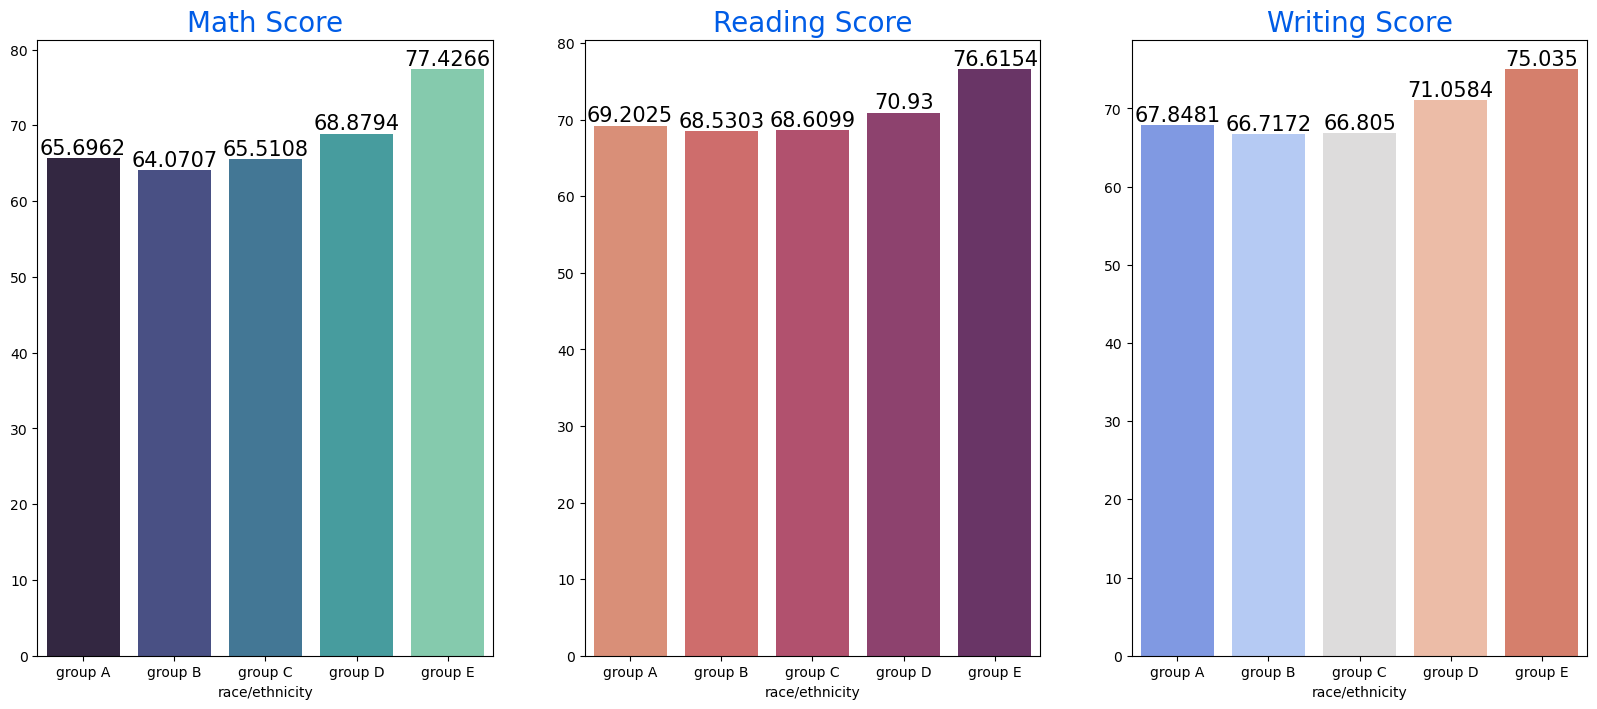

In [55]:
group_data2 = df.groupby('race/ethnicity')

f,ax = plt.subplots(1,3, figsize=(20,8))

sns.barplot(x=group_data2['math score'].mean().index, y=group_data2['math score'].mean().values, palette='mako', ax=ax[0])
ax[0].set_title("Math Score", color='#005ce6', size=20)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

sns.barplot(x=group_data2['reading score'].mean().index, y=group_data2['reading score'].mean().values, palette='flare', ax=ax[1])
ax[1].set_title("Reading Score", color='#005ce6', size=20)

for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

sns.barplot(x=group_data2['writing score'].mean().index, y=group_data2['writing score'].mean().values, palette='coolwarm', ax=ax[2])
ax[2].set_title("Writing Score", color='#005ce6', size=20)

for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)



#### Insights

    Group E students have scored the highest marks.
    Group B students have scored the lowest marks.
    Students from a lower Socioeconomic status have a lower avg in all course subjects

4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN

    What is educational background of student's parent ?
    Is parental education has any impact on student's performance ?

UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

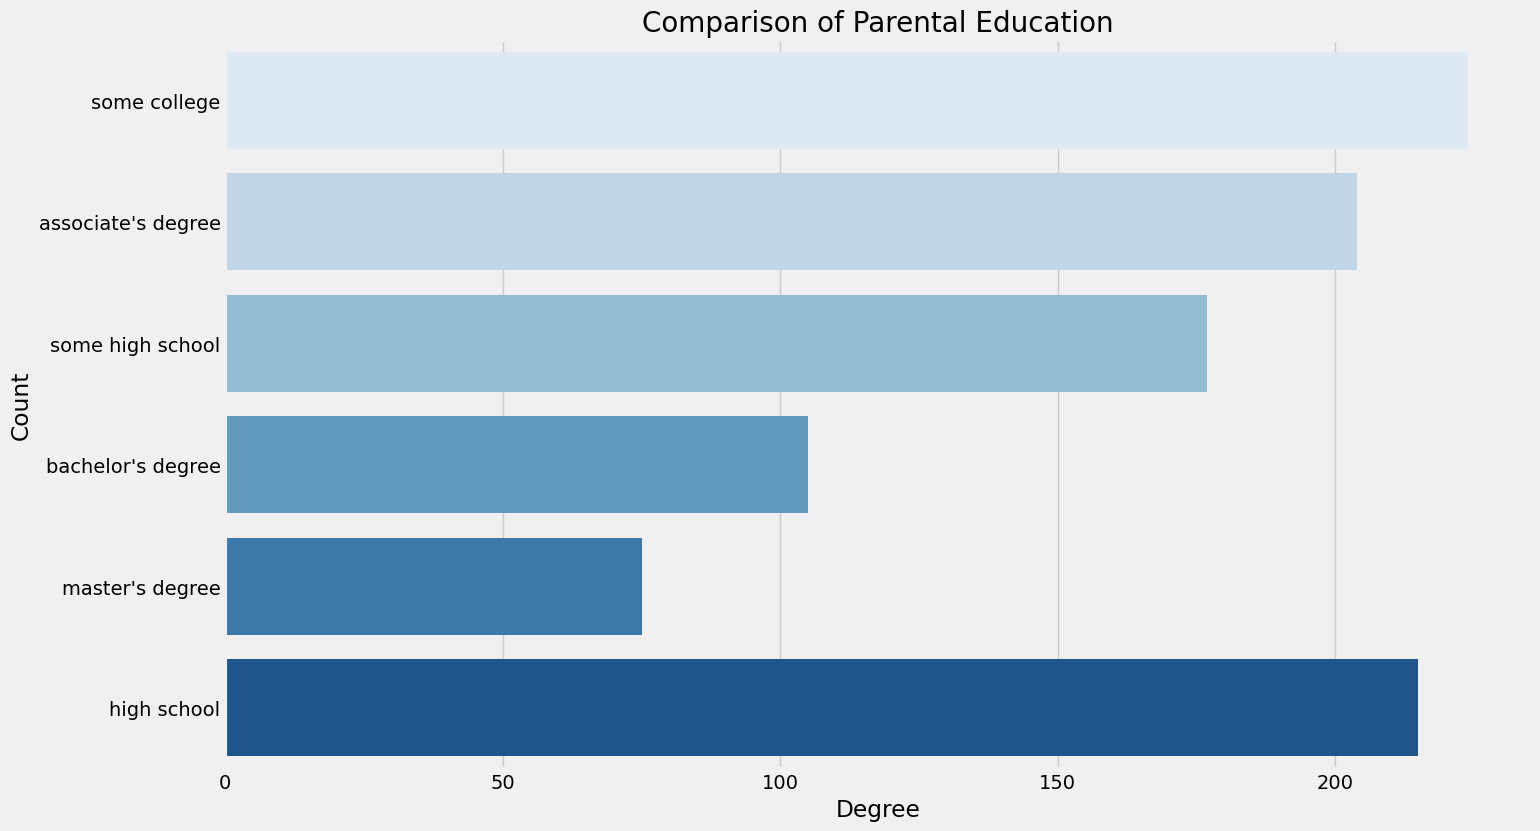

In [66]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette='Blues')
plt.title("Comparison of Parental Education", fontweight=30, fontsize=20)
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()

#### Insights

    Largest number of parents are from some college.

BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance?)

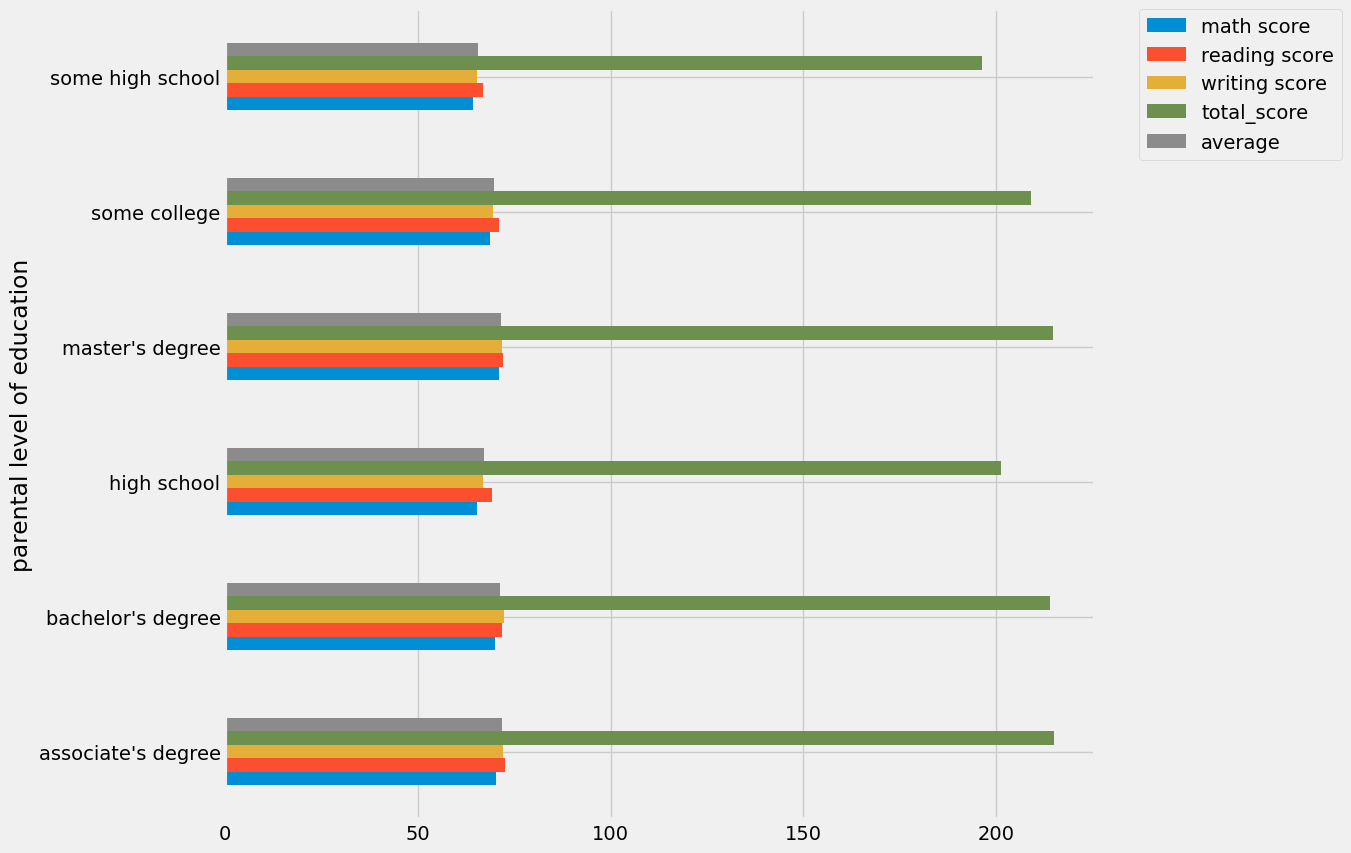

In [74]:
df.groupby('parental level of education')[numeric_df.columns].agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights

    The score of student whose parents possess master and bachelor level education are higher than others.
